# Things to do-:
- Used NYT Archive API to do Analysis.

#### Importing all libraries that are used.

In [1]:
import requests
import json
import os
import csv
import re
import pylab as plt
from bs4 import BeautifulSoup
from collections import Counter
from nltk.tokenize import word_tokenize

#### Step 1
- Data Collection from API using (Request) in JSON form.
- Storing that JSON file in midterm/data/Archive folder.

In [3]:
# Getting Relative Path
relativePath = os.getcwd()

# Checking if data/artcles processed folder is exist in directory or not.
if os.path.isdir(relativePath+"/"+'midterm/') == 1:
    if os.path.isdir(relativePath+"/"+'midterm/data/Archive/jsonData') == 0:
        os.makedirs(relativePath+"/"+'midterm/data/Archive/jsonData')

# Api key stored in ENV.
apiKey = os.getenv('nyt_archive_key')
year = 2017
month = 1

# Hitting API to get data in json form.
url = "https://api.nytimes.com/svc/archive/v1/"+str(year)+"/"+str(month)+".json?api-key="+apiKey
response = requests.get(url)
content  = response.json()

# storing this data in midterm/data/articles
with open(relativePath+"/"+'midterm/data/Archive/jsonData'+"/"+str(month)+"-"+str(year)+'.json', 'w') as file:
    json.dump(content, file)

#### Step 2
- Reading that JSON file in order to get section name and store in list.

In [4]:
# path for reading json file
path = relativePath+"/"+'midterm/data/Archive/jsonData'

# function to append all articles section in list
def getArticles(file, sectionName):
    config = json.loads(open(file).read())
    for x in range(len(config['response']['docs'])):
        section = config['response']['docs'][x]['subsection_name']
        sectionName.append(section)

    
    

sectionName = []
for directory, subDirectory, filename in os.walk(path):
    for file in filename:
        getArticles(os.path.join(directory, file), sectionName)

print(len(sectionName))

5206


#### Step 3
- Looping through Section List to find count of all section name.

In [5]:
# creating empty dictionary.
frequency={}

#Looping through new List and getting the count of every word and storing in Dictionary.
for word in sectionName:
    count = frequency.get(word,0)
    frequency[word] = count + 1
    
# Defining Lambda function to sort in descending order.
sortedDict = sorted(frequency.items(), key=lambda x: (-x[1], x[0])) # sorted is used to sort dictionary in descending order.
print(sortedDict[:10])

[(None, 2775), ('Politics', 451), ('Europe', 148), ('Asia Pacific', 143), ('DealBook', 136), ('Music', 124), ('Television', 121), ('Book Review', 105), ('Art & Design', 87), ('Middle East', 78)]


In [6]:
# Assigning rank to every section from top to bottom.

i = 0
rankList = []

# Looping in order to assign rank to each word.
for rank in range(len(sortedDict)):
    obj1 = sortedDict[rank]
    obj1 = obj1 + (i,)
    rankList.append(obj1)
    i = i+1

#### Step 4
- Writting that list in CSV form in midterm/que[1-2]/ana_[1-3]/Articles/result

In [7]:
# Checking if data processed folder is exist in directory or not.
if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/') == 1:
    if os.path.isdir(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Articles/result') == 0:
        os.makedirs(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Articles/result')

# creating CSV file that contains (Word, Frequency, Rank) sorted by Rank.
fileName = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Articles/result/topicCount.csv'

# Writing the data in to CSV file and storing in D drive.
with open(fileName, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Category", "Count"])
    a.writerows(rankList[:10])

In [8]:
# Reading data from csv in order to ploton graph.

label = []
y = []
z = []

# Reading CSV file in order to generate loglog figure.
with open(fileName,'r') as csvfile:
    next(csvfile)
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        label.append(row[0])
        y.append(int(row[1]))
        z.append(int(row[2]))


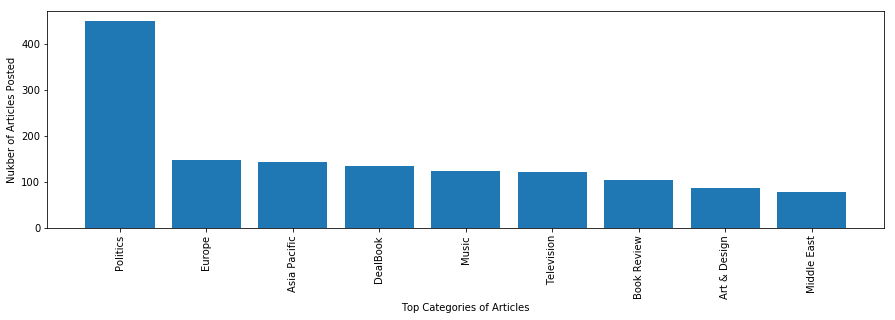

In [9]:
# storing figure in png file and stored in D drive.
pieFig = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Articles/result/percentTopic.png'

plt.figure(figsize=(15,4))
plt.bar(z, y, align='center')
plt.xticks(z, label, rotation=90)
plt.xlabel("Top Categories of Articles")
plt.ylabel("Nukber of Articles Posted")
plt.savefig(pieFig, bbox_inches='tight')
plt.show()

### As we can see from above in January'17 the top category was "Politics".
- The Most Poweful Presidential Candidate's was
    - Donald Trump
    
    
- Will do some Analysis on Donald Trump.


- Data Collection for Donald Trump from JSON file.

In [10]:
# function to collect sub section name which contains Trump.
def getValue(file, keyWords):
    config = json.loads(open(file).read())
    for x in range(len(config['response']['docs'])):
        headline = config['response']['docs'][x]['headline']['main']
        if 'Donald Trump' in headline:
            for y in range(len(config['response']['docs'][x]['keywords'])):
                val = config['response']['docs'][x]['keywords'][y]['value']
                keyWords.append(val)

    
    

keyWords = []
for directory, subDirectory, filename in os.walk(path):
    for file in filename:
        getValue(os.path.join(directory, file), keyWords)

In [11]:
# Writting all KeyWords in text file stored in midterm/que[1-2]/ana_[1-3]/Articles/politicalArticles/keyWords.txt'

with open(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Articles/politicalArticles/keyWords.txt', "w") as f:
    for keyVal in keyWords:
        f.write(keyVal)
        f.write("\n")


In [12]:
# Looping through text file in order to find top most 10 sub categories.

with open(relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Articles/politicalArticles/keyWords.txt', "r") as f:
    data = f.readlines()
    
unique_words = {} # I created a Dictionary to store all unique words.
for word in data: # Looped over all Words to find the unique one's and added into the Dictionary.
    word = word.replace("\n", "")
    if word in unique_words:
        unique_words[word] += 1
    else:
        unique_words[word] = 1
        
sortedDict = sorted(unique_words.items(), key=lambda x: (-x[1], x[0]))
    
newList = sortedDict[1:11]
print(newList)

[('United States Politics and Government', 42), ('Presidential Election of 2016', 11), ('Inaugurations', 10), ('News and News Media', 10), ('Appointments and Executive Changes', 9), ('Republican Party', 8), ('United States International Relations', 8), ('Russia', 7), ('Espionage and Intelligence Services', 6), ('Cyberwarfare and Defense', 5)]


In [13]:
# Ranking on basis of top to last.

i = 1
newKeyWordList = []

# Looping in order to assign rank to each word.
for rank in range(len(newList)):
    obj1 = newList[rank]
    obj1 = obj1 + (i,)
    newKeyWordList.append(obj1)
    i = i+1
    
    

In [14]:
# creating CSV file that contains (Keywords, count, Rank) sorted by Rank.
# Stored in midterm/que[1-2]/ana_[1-3]/Articles/result/keyWords.csv

fileNameNew = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Articles/result/keyWords.csv'

# Writing the data in to CSV file and storing in D drive.
with open(fileNameNew, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["KeyWords", "Count", "Rank"])
    a.writerows(newKeyWordList)

In [15]:
# Collecting data from csv file and sending to bar graph.
key = []
count = []
rank = []

# Reading CSV file in order to generate loglog figure.
with open(fileNameNew,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        key.append(str((row[0])))
        count.append(int(row[1]))
        rank.append(int(row[2]))

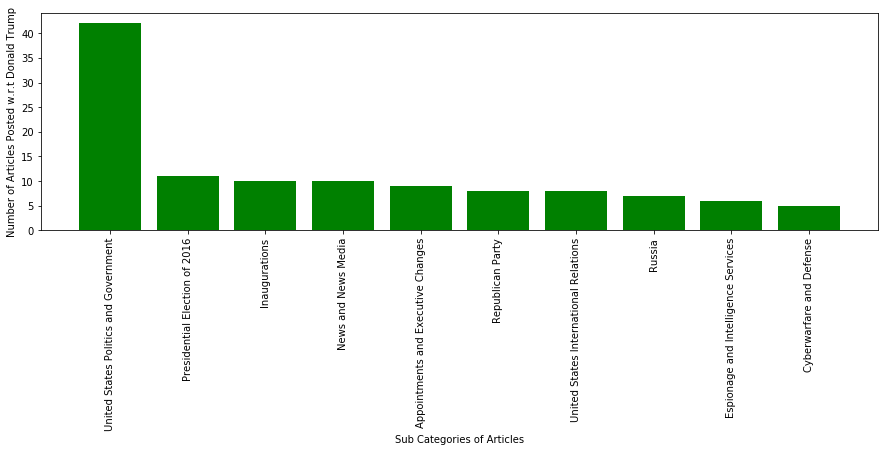

In [16]:
# Plotting bar graph showing sub categories.

exportFig = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Articles/result/keyWordsPercent.png'
plt.figure(figsize=(15,4))
plt.bar(rank, count, align='center', color='green')
plt.xticks(rank, key, rotation=90)
plt.xlabel("Sub Categories of Articles")
plt.ylabel("Number of Articles Posted w.r.t Donald Trump")
plt.savefig(exportFig, bbox_inches='tight')
plt.show()

## Final Conclusion

- NYT Posted total of 5206 Articles in JAN'17 out which.
- NYT Posted majority of articles related to Politics in Jan'17.
- Out of which major was related to Donald Trump.
- The Top most sub category was "UNited states and Politics" & Second Top was Presidential Election.